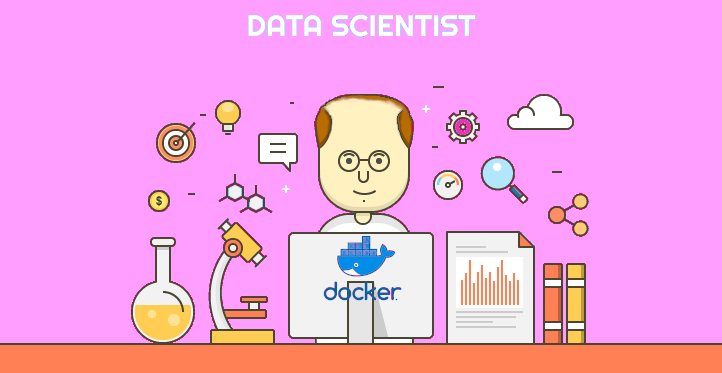

# Limpeza de Base

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Ler a Base

RMS Titanic que foi pensado para ser o navio mais luxuoso e seguro de sua época e supostamente "inafundável". Como sabemos em sua viagem inaugural de Southampton para Nova Iorque afundou no dia 14 de abril de 1912 com mais de 1.500 pessoas a bordo. Porém esta base contém apenas 891 registros.

In [ ]:
df = pd.read_csv('../bases/titanic.csv')
df.head()

In [ ]:
df.info()

## Visualizando valores nulos

In [ ]:
print(df.isnull().sum())

In [ ]:
# Separar somente os nulos
null_value_stats = df.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

In [ ]:
# Mostrar mais "amigavelmente" os valores nulos
def mostrarNulos(data):
    null_sum = data.isnull().sum()
    total = null_sum.sort_values(ascending=False)
    percent = (((null_sum / len(data.index))*100).round(2)).sort_values(ascending=False)
    df_NULL = pd.concat([total, percent], axis=1, keys=['Tot.Nulo', 'Perc.Nulo'])
    # Limpar as linhas que não têm dados ausentes
    df_NULL = df_NULL[(df_NULL.T != 0).any()]
    return df_NULL

df_Age = mostrarNulos(df)
df_Age.head()

## Mostrar a Idade no Gráfico

In [ ]:
# Se tentarmos gerar um gráfico por IDADE...
def executarGrafico():
    try:
        sns.displot([df['Age']])
        plt.show()
    except ValueError as err:
        print(err)
    
executarGrafico()

## Métodos Utilizados

Observamos que como cada método modifica os dados, é necessário em cada um deles: Ler a base, aplicar o método e mostrar o gráfico.

In [ ]:
# Método 1a - Preencher os valores null com qualquer valor: 0, -999, ...
df = pd.read_csv('../bases/titanic.csv')
df['Age'].fillna(-100, inplace=True)
executarGrafico()

In [ ]:
# Método 1b - Preencher os valores null com a média
df = pd.read_csv('../bases/titanic.csv')
df['Age'] = df['Age'].fillna(df['Age'].mean())
executarGrafico()

In [ ]:
# Método 1c - Preencher os valores null com a mediana
df = pd.read_csv('../bases/titanic.csv')
df['Age'] = df['Age'].fillna(df['Age'].median())
executarGrafico()

In [ ]:
# Método 2a - Eliminar Valores
df = pd.read_csv('../bases/titanic.csv')
df = df.dropna(axis=0)
executarGrafico()

In [ ]:
df.count()

In [ ]:
# Método 2b - Mostrar a coluna sem os valores nulos
df = pd.read_csv('../bases/titanic.csv')
df['Age'] = df['Age'].dropna(axis=0)
executarGrafico()

In [ ]:
df.count()

In [ ]:
df = df.drop(['Cabin'], axis=1)
df = df.drop(['PassengerId'], axis=1)
df = df.drop(['Name'], axis=1)
df

### Relacionamento entre as variáveis

In [ ]:
rel = df.corr()
sns.heatmap(rel, xticklabels=rel.columns, yticklabels=rel.columns, annot=True)

Até a próxima \
Fernando Anselmo